In [22]:
import numpy as np
from numpy.random import rand
import matplotlib.pyplot as plt
from tabulate import tabulate

# Calcul de Holm 

Holm trouve que les équipotentielles sont des ellipsoides d'equations suivantes : 
$$
\frac{x^2}{\alpha^2 + \mu} +\frac{y^2}{\beta^2 + \mu} +\frac{z^2}{\mu} = 1
$$
<br/>
On suppose dans notre cas seulement des ellipses en deux dimensions : 
$$
\frac{x^2}{\alpha^2 + \mu} +\frac{y^2}{\mu} = 1
$$
<br/>

On peut écrire pour la moitié supérieure :
$$
y=\sqrt{\left( 1-\frac{x^2}{\alpha^2 + \mu} \right) \mu }
$$

C:\Users\antoi\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in sqrt
  
C:\Users\antoi\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in sqrt
  del sys.path[0]


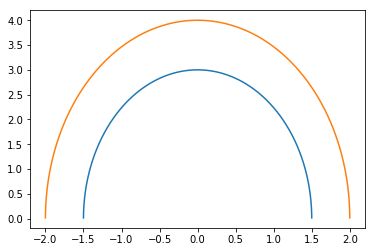

In [112]:
mu=0
a=1
b=2*a
x=np.linspace(-10.0, 10.0, num=500000)

a=1.5
b=2*a
y=((1-x**2/(a**2 + mu))*(b**2 + mu))**(0.5)
fig=plt.plot(x,y)

a=2
b=2*a
y=((1-x**2/(a**2 + mu))*(b**2 + mu))**(0.5)
fig=plt.plot(x,y)

Les erreurs viennent du domaine de définition de x, il va faire des racines négatives.

C:\Users\antoi\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in sqrt
  


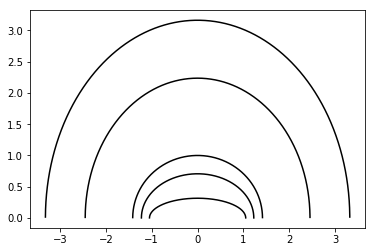

In [113]:
mu=2
a=1
x=np.linspace(-10.0, 10.0, num=500000)

for mu in [0.1,0.5,1,5,10]:
    y=((1-x**2/(a**2 + mu))*(mu))**(0.5)
    fig=plt.plot(x,y,color='black')

**Problème** : Comme les courbes sont très pentues à la fin du graphe (en 1.5 ici) il faut énormement de point pour pouvoir être precis et que ça descende jusqu'à 0.  De plus il va être compliqué de tracer les lignes de courant avec cette méthode. On passe alors en coordonnées polaire. 
<br>
$x=\rho cos\theta$ et $y=\rho sin\theta$

$$ \frac{\rho^2 cos^2 \theta}{\alpha^2+\mu}+\frac{\rho^2 sin^2 \theta}{\mu}=1$$

En isolant $\rho$ on a : 

$$\rho = \sqrt{\frac{\alpha^2 + \mu}{1 + \sin^2 \theta \frac{\alpha^2}{\mu}}}$$

<br>

On réécrira $x=\rho cos\theta$ et $y=\rho sin\theta$ pour pouvoir le tracer.

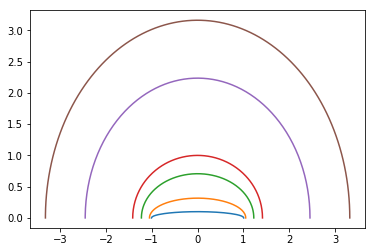

In [230]:
#N : Nombre de points 
N=200
#N2 : Nombre de ligne de courants 
N2=10
theta=np.linspace(0,np.pi,N)
x=np.zeros(N)
y=np.zeros(N)
for mu in [0.01,0.1,0.5,1,5,10]:
    p = ((a**2 + mu )/(1 + ((np.sin(theta))**2)*((a**2)/mu)))**(1.0/2)
    x=p*np.cos(theta)
    y=p*np.sin(theta)
    plt.plot(x,y)

indices = np.arange(10,200,10)
x2 = [x[i] for i in indices] 
y2 = [y[i] for i in indices]


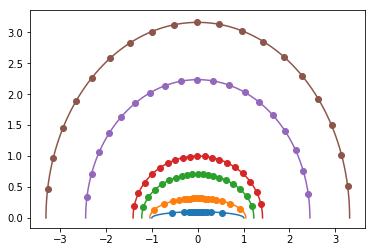

In [193]:
#N : Nombre de points 
N=200
#N2 : Nombre de ligne de courants 
N2=10
theta=np.linspace(0,np.pi,N)
indices = np.arange(10,N,N2)
x2,y2 = np.zeros(len(indices)),np.zeros(len(indices))

for mu in [0.01,0.1,0.5,1,5,10]:
    p = ((a**2 + mu )/(1 + ((np.sin(theta))**2)*((a**2)/mu)))**(1.0/2)
    x=p*np.cos(theta)
    y=p*np.sin(theta)
    i=0
    for n in indices: 
        x2[i] = x[n] 
        y2[i] = y[n]
        i=i+1
    plt.scatter(x2,y2)
    plt.plot(x,y)

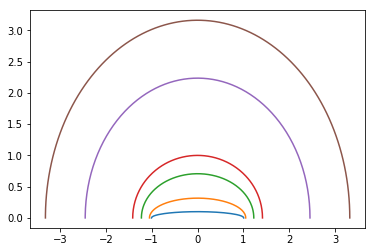

In [192]:
#N : Nombre de points 
N=200
#N2 : Nombre de ligne de courants 
N2=10
theta=np.linspace(0,np.pi,N)
x=np.zeros(N)
y=np.zeros(N)
for mu in [0.01,0.1,0.5,1,5,10]:
    p = ((a**2 + mu )/(1 + ((np.sin(theta))**2)*((a**2)/mu)))**(1.0/2)
    f=np.gradient(p)
    x=p*np.cos(theta)
    y=p*np.sin(theta)
    plt.plot(x,y)

In [223]:
def f(x,y):
    """Fonction de Rosenbrock."""
    return (x**2/(a**2+mu)+y**2/(mu)-1)

def g(x,y):
    p=(r**2 + b**2 -2*b*r*np.cos(theta))**(1.0/2)
    
    return (x**2/(a**2+mu)+y**2/(mu)-1)

In [220]:
x , y = np.meshgrid(np.linspace(-1,1,201),np.linspace(0,1,201))
z = f(x,y)

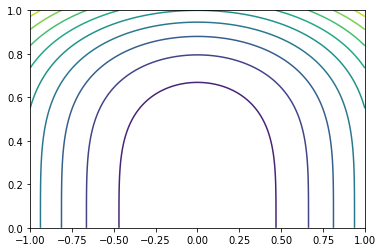

In [221]:
graphe = plt.contour(x,y,z,10)